In [191]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_iris
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.feature_selection import RFE
from sklearn.inspection import permutation_importance

In [192]:
df = pd.read_csv('possum.csv')
df

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,100,7,other,m,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
100,101,7,other,m,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
101,102,7,other,f,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
102,103,7,other,m,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0


In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       102 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  103 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


In [194]:
df.shape

(104, 14)

In [195]:
df.isnull().sum()

case        0
site        0
Pop         0
sex         0
age         2
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    1
earconch    0
eye         0
chest       0
belly       0
dtype: int64

In [196]:
rows_with_nulls = df[df.isnull().any(axis=1)]
print(rows_with_nulls)

    case  site  Pop sex  age  hdlngth  skullw  totlngth  taill  footlgth  \
40    41     2  Vic   f  5.0     88.4    57.0      83.0   36.5       NaN   
43    44     2  Vic   m  NaN     85.1    51.5      76.0   35.5      70.3   
45    46     2  Vic   m  NaN     91.4    54.4      84.0   35.0      72.8   

    earconch   eye  chest  belly  
40      40.3  15.9   27.0   30.5  
43      52.6  14.4   23.0   27.0  
45      51.2  14.4   24.5   35.0  


In [197]:
df[40:50]

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
40,41,2,Vic,f,5.0,88.4,57.0,83.0,36.5,NaN,40.3,15.9,27.0,30.5
41,42,2,Vic,m,3.0,85.3,54.1,77.0,32.0,62.7,51.2,13.8,25.5,33.0
42,43,2,Vic,f,2.0,90.0,55.5,81.0,32.0,72.0,49.4,13.4,29.0,31.0
43,44,2,Vic,m,NaN,85.1,51.5,76.0,35.5,70.3,52.6,14.4,23.0,27.0
44,45,2,Vic,m,3.0,90.7,55.9,81.0,34.0,71.5,54.0,14.6,27.0,31.5
45,46,2,Vic,m,NaN,91.4,54.4,84.0,35.0,72.8,51.2,14.4,24.5,35.0
46,47,3,other,m,2.0,90.1,54.8,89.0,37.5,66.0,45.5,15.0,25.0,33.0
47,48,3,other,m,5.0,98.6,63.2,85.0,34.0,66.9,44.9,17.0,28.0,35.0
48,49,3,other,m,4.0,95.4,59.2,85.0,37.0,69.0,45.0,15.9,29.5,35.5
49,50,3,other,f,5.0,91.6,56.4,88.0,38.0,65.0,47.2,14.9,28.0,36.0


In [198]:
df['sex'] = df['sex'].map({'m': 1, 'f': 0})
df['Pop'] = df['Pop'].map({'Vic': 1, 'other': 0})
df.drop(['case', 'site'], axis=1, inplace=True)
df.dropna(inplace=True)
df

,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,1,0,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,1,0,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,1,0,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,1,0,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...
99,0,1,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
100,0,1,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
101,0,0,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
102,0,1,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0


In [199]:
df.duplicated().sum()

0

In [200]:
df.isnull().sum()

Pop         0
sex         0
age         0
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    0
earconch    0
eye         0
chest       0
belly       0
dtype: int64

In [201]:
df.describe()

,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.584158,3.821782,92.730693,56.960396,87.269307,37.049505,68.398020,48.133663,15.050495,27.064356,32.638614
std,0.496921,0.495325,1.915182,3.518714,3.102679,4.196802,1.971681,4.413502,4.060352,1.058643,2.020722,2.727745
min,0.000000,0.000000,1.000000,82.500000,50.000000,75.000000,32.000000,60.300000,41.300000,12.800000,22.000000,25.000000
25%,0.000000,0.000000,2.000000,90.700000,55.000000,84.500000,36.000000,64.500000,44.800000,14.400000,25.500000,31.000000
50%,0.000000,1.000000,3.000000,92.900000,56.400000,88.000000,37.000000,67.900000,46.800000,14.900000,27.000000,32.500000
75%,1.000000,1.000000,5.000000,94.800000,58.100000,90.000000,38.000000,72.500000,52.000000,15.700000,28.000000,34.000000
max,1.000000,1.000000,9.000000,103.100000,68.600000,96.500000,43.000000,77.900000,56.200000,17.800000,32.000000,40.000000


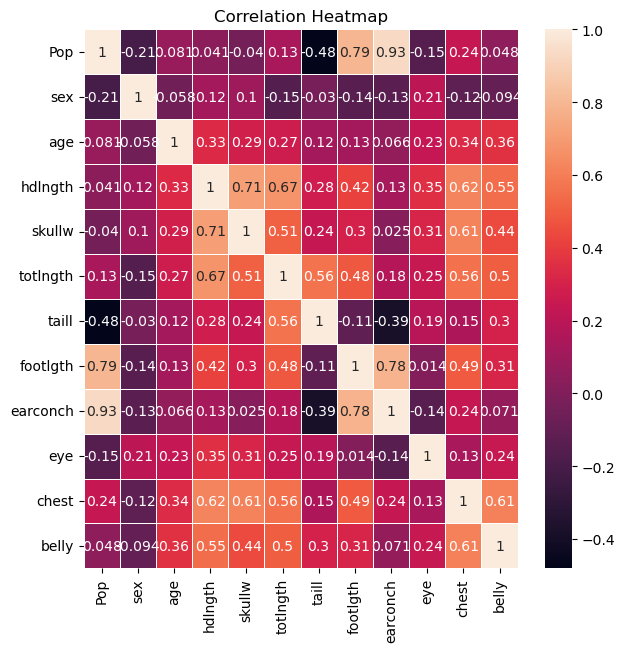

In [202]:
correlation_matrix = df.corr()
plt.figure(figsize=(7, 7))
sns.heatmap(correlation_matrix, annot=True, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Модель регрессии

In [203]:
# Разделение данных на признаки (X) и целевую переменную (y)
X = df.drop('age', axis=1)
y = df['age']

# Разделение данных на обучающий и тестовый набор
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

# Проверка качества модели на тестовом наборе
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'MSE на тестовом наборе: {mse}')

# проверяем r2
print(f"R2 на train: {model.score(X_train, y_train)}")
print(f"R2 на test: {model.score(X_test, y_test)}")

MSE на тестовом наборе: 4.29707966006108
R2 на train: 0.26620568903306596
R2 на test: 0.04964286354717362


In [204]:
# Создаём X и y
X = df.drop('age', axis=1)
y = df['age']

# Разбиение на train и teat
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#StandardScaler()
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#модель
model = Ridge(alpha=1)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error на тестовом наборе: {mse}')

# проверяем r2
print(f"R2 на train: {model.score(X_train, y_train)}")
print(f"R2 на test: {model.score(X_test, y_test)}")

Mean Squared Error на тестовом наборе: 4.246463815162475
R2 на train: 0.26464964400316227
R2 на test: 0.06083724047810879


# Уберем выбросы

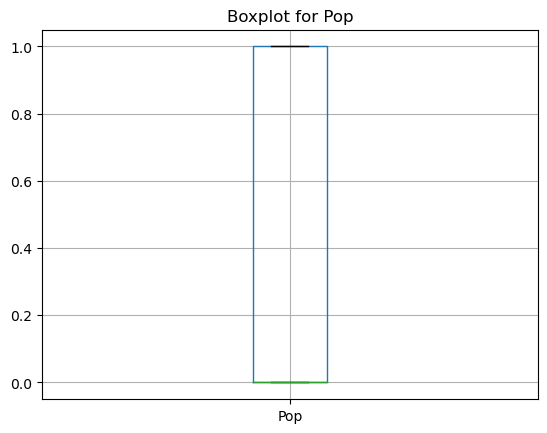

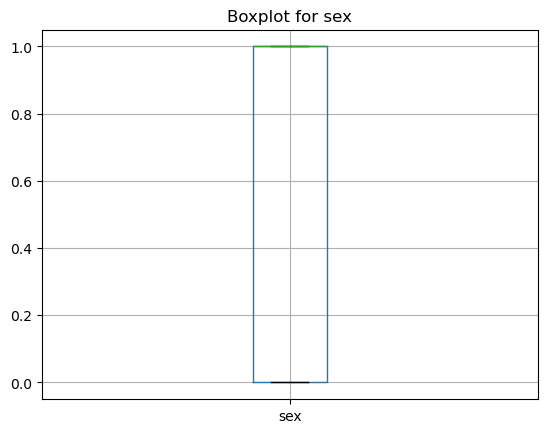

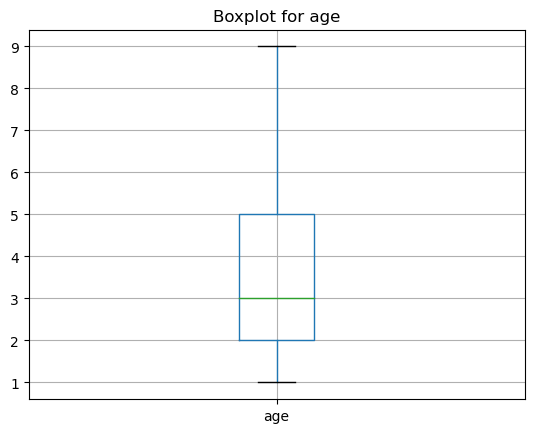

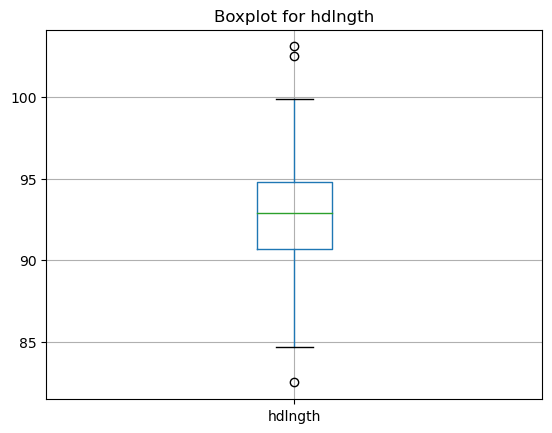

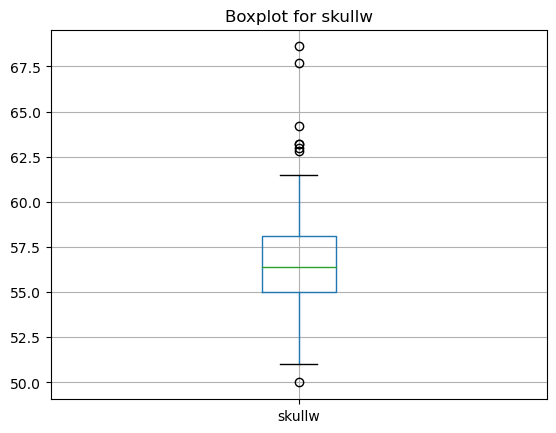

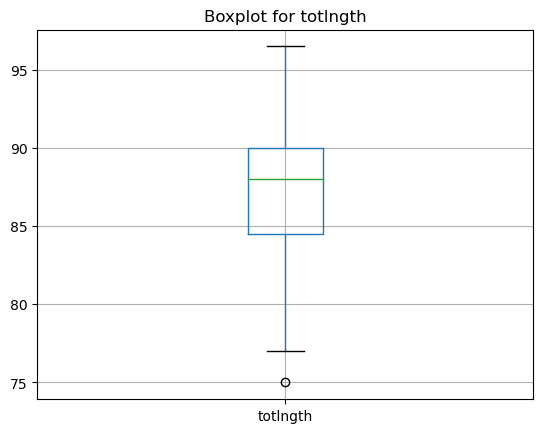

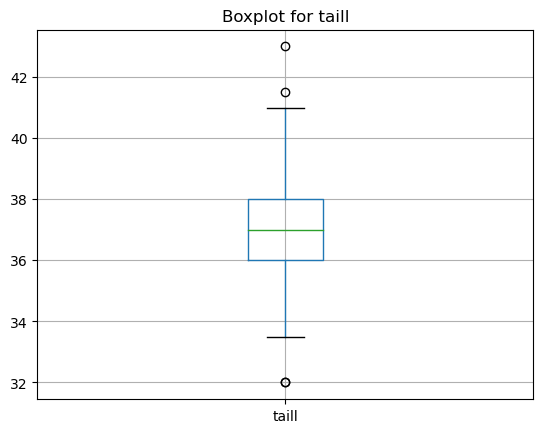

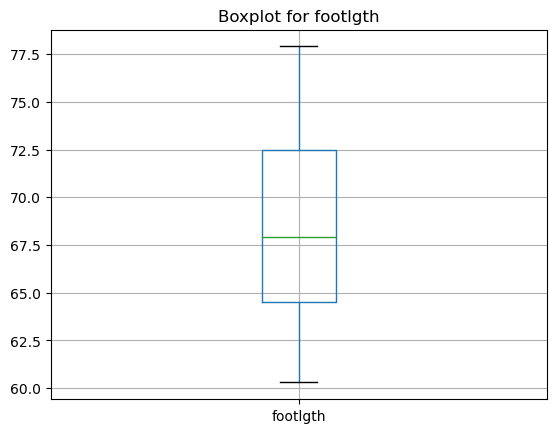

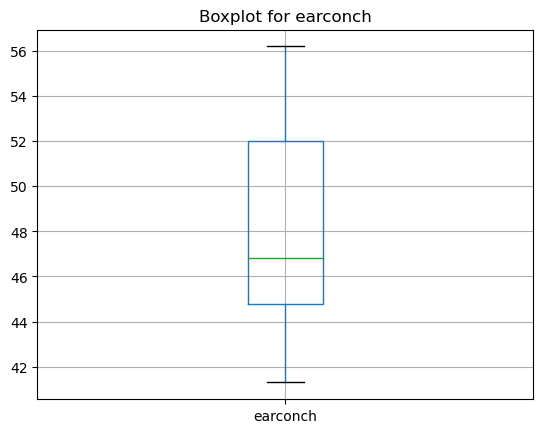

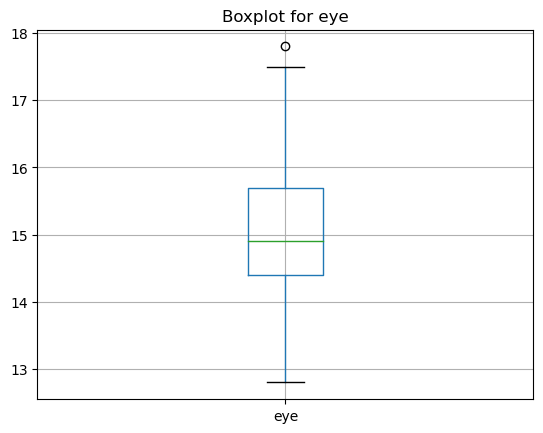

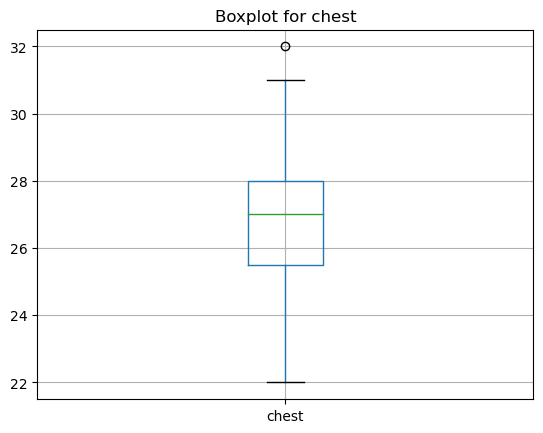

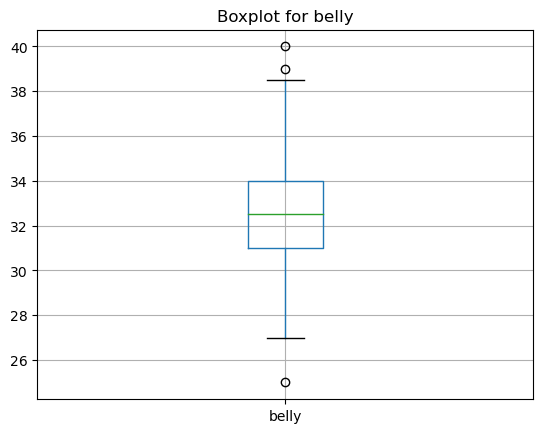

In [205]:
for column in df.columns:
    plt.figure() 
    df.boxplot(column=column)
    plt.title(f'Boxplot for {column}')
    plt.show()

<AxesSubplot:>

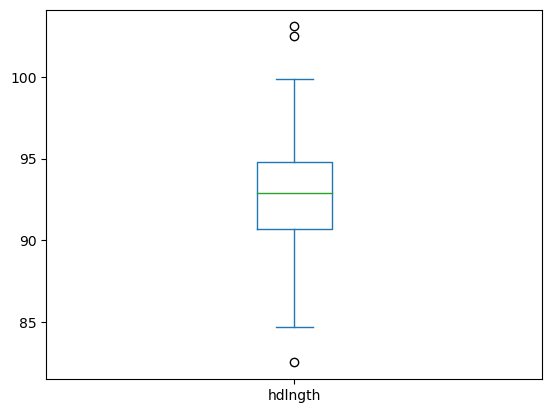

In [206]:
df['hdlngth'].plot(kind ='box')

In [207]:
df['hdlngth'].describe()

count    101.000000
mean      92.730693
std        3.518714
min       82.500000
25%       90.700000
50%       92.900000
75%       94.800000
max      103.100000
Name: hdlngth, dtype: float64

In [208]:
q_hi  = df["hdlngth"].quantile(0.99)
q_low = df["hdlngth"].quantile(0.02) 

df = df[(df["hdlngth"] < q_hi) & (df["hdlngth"] > q_low)]

<AxesSubplot:>

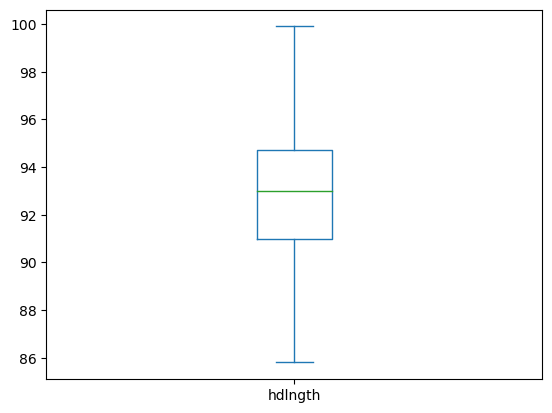

In [209]:
df['hdlngth'].plot(kind ='box')

In [210]:
df.shape

(96, 12)

<AxesSubplot:>

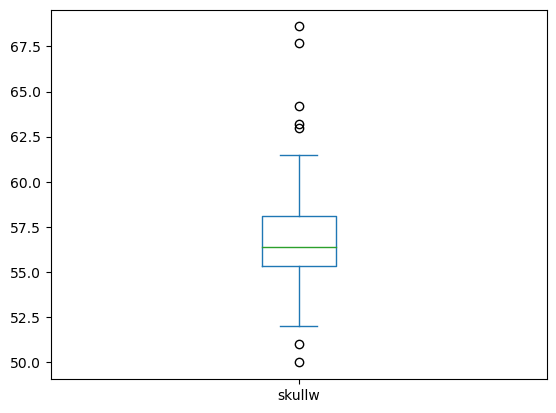

In [211]:
df['skullw'].plot(kind ='box')

In [212]:
df['skullw'].describe()

count    96.000000
mean     56.969792
std       2.955641
min      50.000000
25%      55.350000
50%      56.400000
75%      58.100000
max      68.600000
Name: skullw, dtype: float64

In [213]:
hi = 62.5
low = 52

df = df[(df['skullw'] > low)]
df = df[(df['skullw'] < hi)]

<AxesSubplot:>

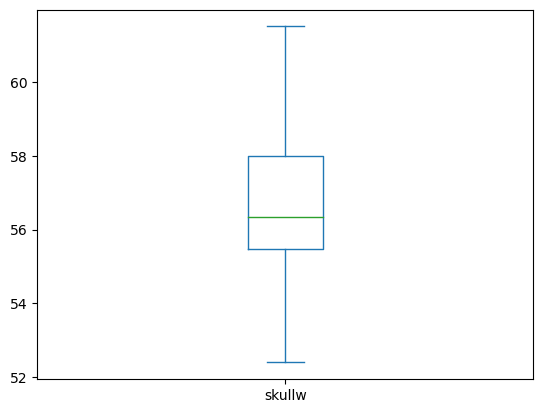

In [214]:
df['skullw'].plot(kind ='box')

In [215]:
df.shape

(88, 12)

<AxesSubplot:>

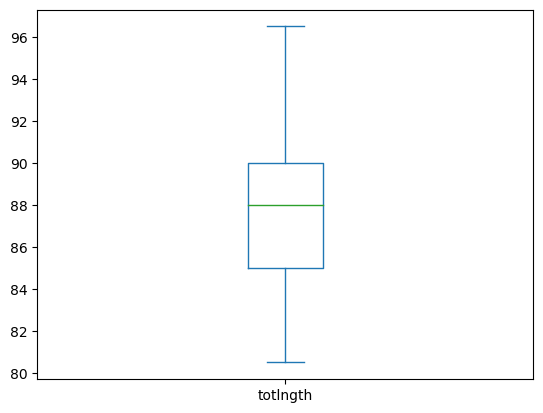

In [216]:
df['totlngth'].plot(kind='box')

<AxesSubplot:>

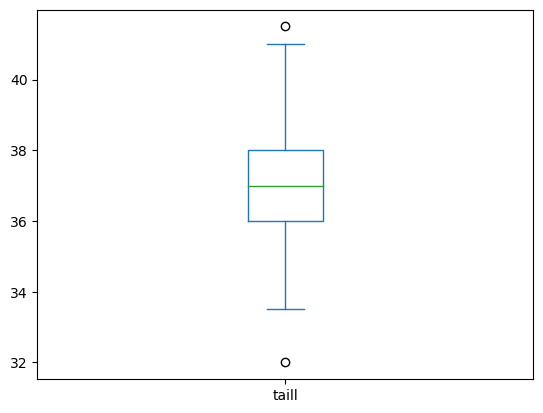

In [217]:
df['taill'].plot(kind='box')

In [218]:
df.loc[df['taill'] > 40]

,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
56,0,0,4.0,95.1,59.4,93.0,41.0,67.2,45.3,14.5,31.0,39.0
75,0,1,5.0,92.4,56.8,89.0,41.0,64.5,46.4,17.8,26.0,33.0
84,0,1,3.0,89.5,56.2,92.0,40.5,65.6,43.5,14.5,27.0,31.5
86,0,1,2.0,98.5,60.7,93.0,41.5,71.7,46.8,15.0,26.0,36.0


In [219]:
df.loc[df['taill'] < 34]

,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
29,1,0,2.0,92.1,54.4,84.0,33.5,70.6,50.8,14.5,24.5,33.0
42,1,0,2.0,90.0,55.5,81.0,32.0,72.0,49.4,13.4,29.0,31.0


In [220]:
hi = 41.5
low = 32

df = df[(df['taill'] > low)]
df = df[(df['taill'] < hi)]

<AxesSubplot:>

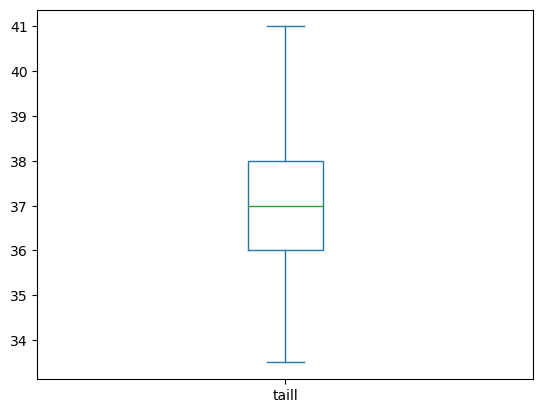

In [221]:
df['taill'].plot(kind='box')

In [222]:
df.shape

(86, 12)

<AxesSubplot:>

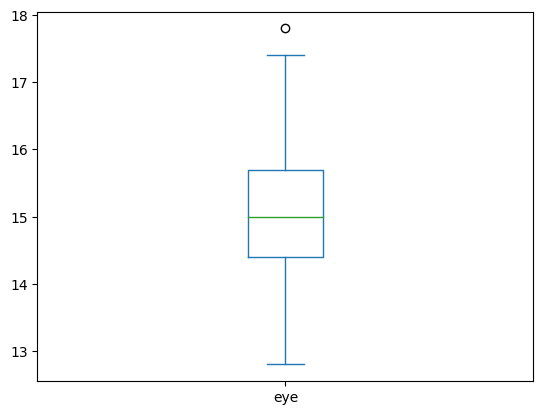

In [223]:
df['eye'].plot(kind='box')

In [224]:
df.loc[df['eye'] > 17]

,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
50,0,0,5.0,95.6,59.6,85.0,36.0,64.0,43.9,17.4,28.0,38.5
63,0,0,3.0,96.9,56.5,89.5,38.5,63.0,45.1,17.1,25.5,33.0
67,0,1,5.0,94.1,56.0,88.5,38.0,65.9,43.1,17.4,27.0,30.0
75,0,1,5.0,92.4,56.8,89.0,41.0,64.5,46.4,17.8,26.0,33.0


In [225]:
df = df[(df['eye'] < 17.8)]

<AxesSubplot:>

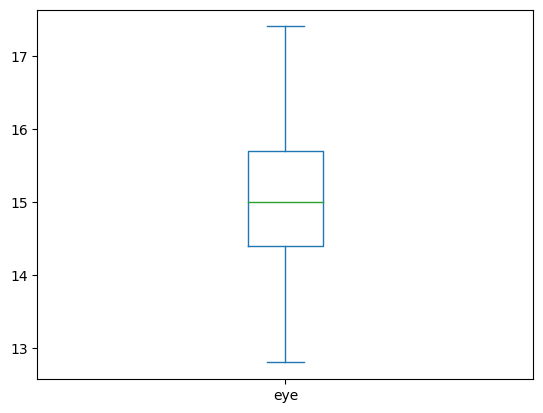

In [226]:
df['eye'].plot(kind='box')

<AxesSubplot:>

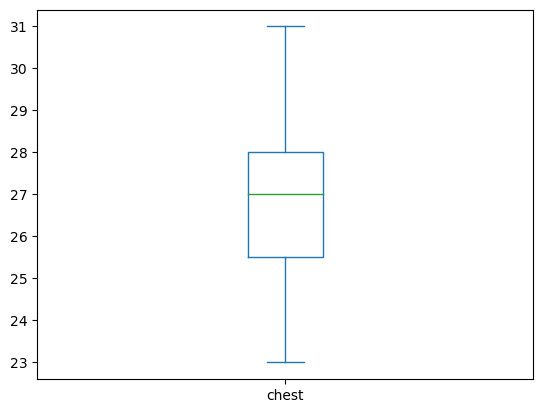

In [227]:
df['chest'].plot(kind='box')

<AxesSubplot:>

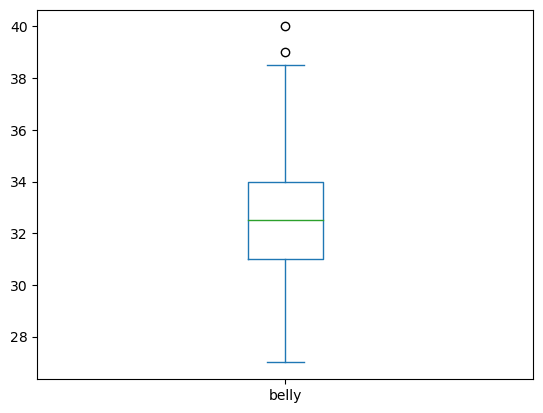

In [228]:
df['belly'].plot(kind='box')

In [229]:
df.loc[df['belly'] > 38]

,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
20,1,0,3.0,95.9,58.1,96.5,39.5,77.9,52.9,14.2,30.0,40.0
50,0,0,5.0,95.6,59.6,85.0,36.0,64.0,43.9,17.4,28.0,38.5
56,0,0,4.0,95.1,59.4,93.0,41.0,67.2,45.3,14.5,31.0,39.0
64,0,0,5.0,93.5,57.4,88.5,38.0,68.2,41.7,14.0,29.0,38.5


In [230]:
df = df[(df['belly'] < 39)]

<AxesSubplot:>

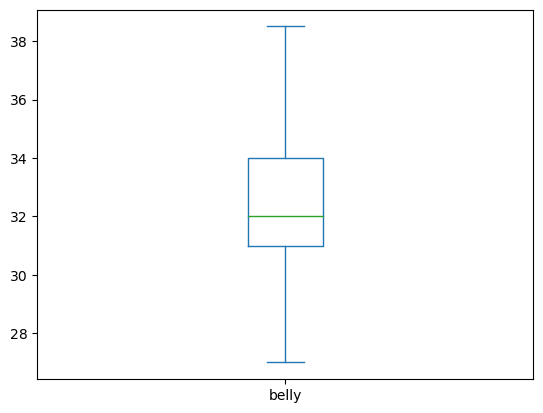

In [231]:
df['belly'].plot(kind='box')

In [232]:
df.shape

(83, 12)

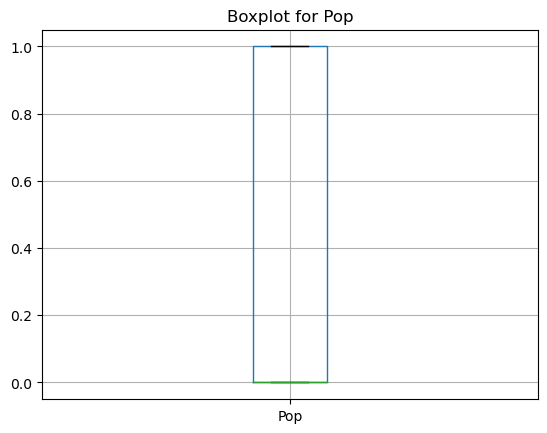

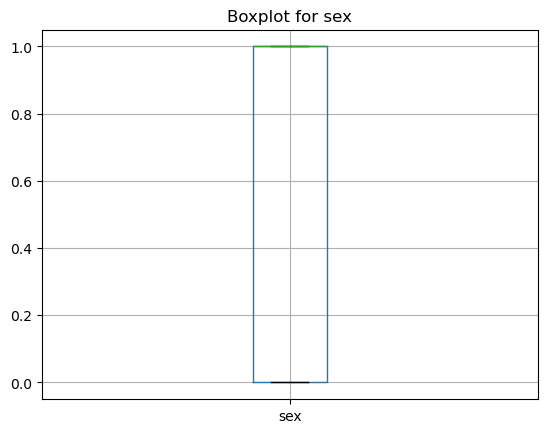

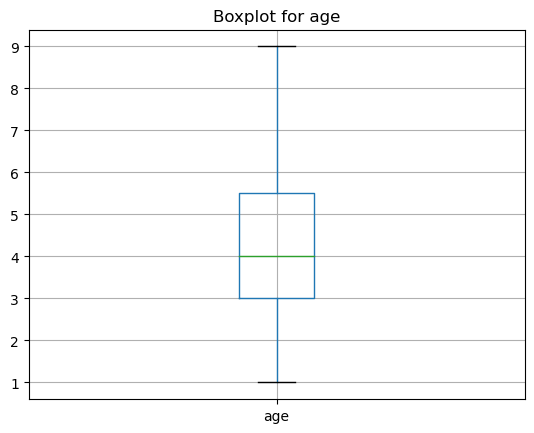

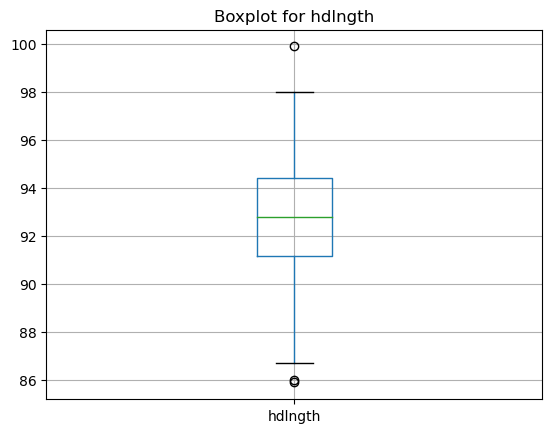

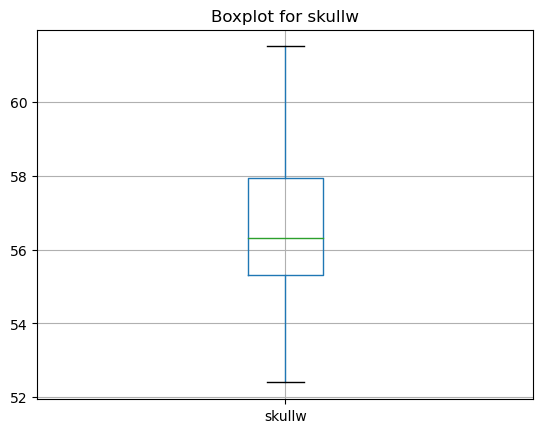

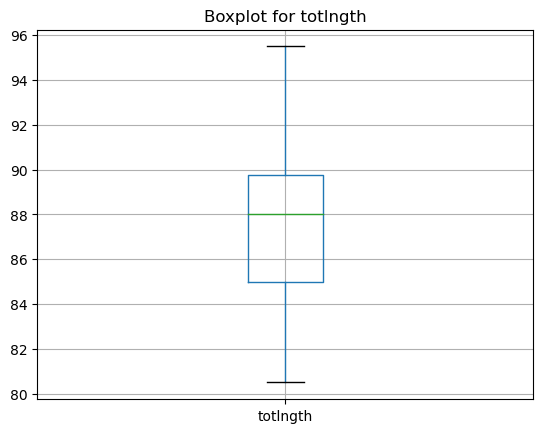

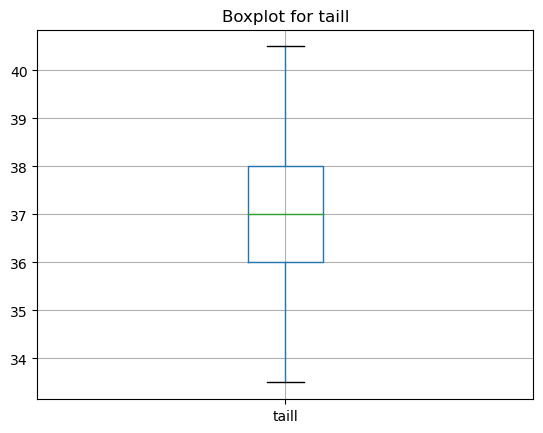

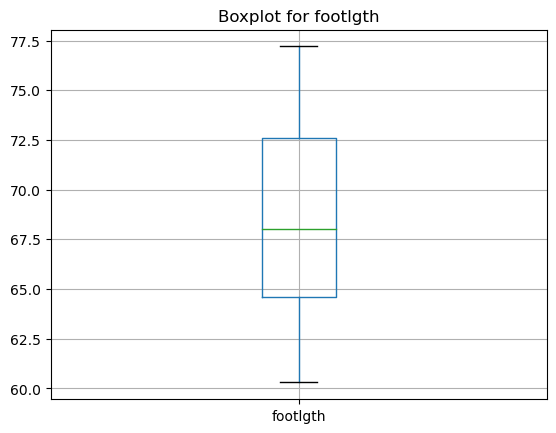

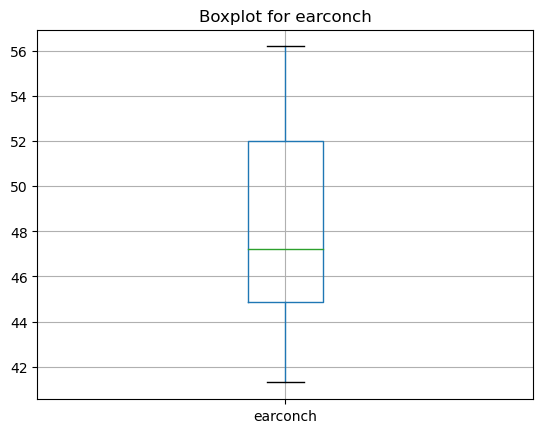

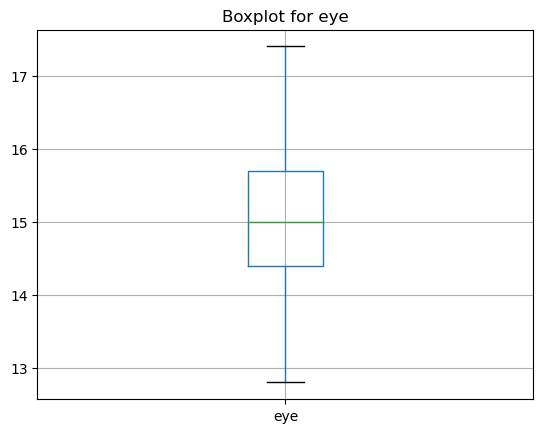

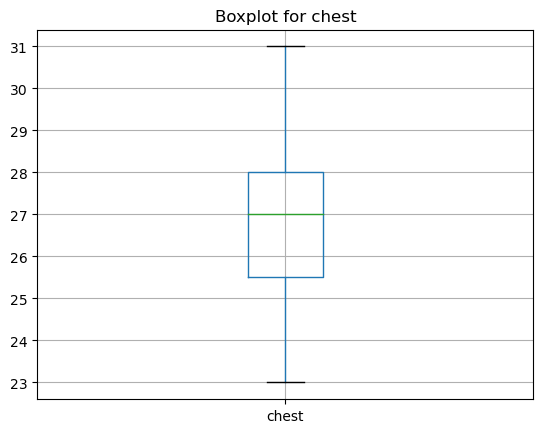

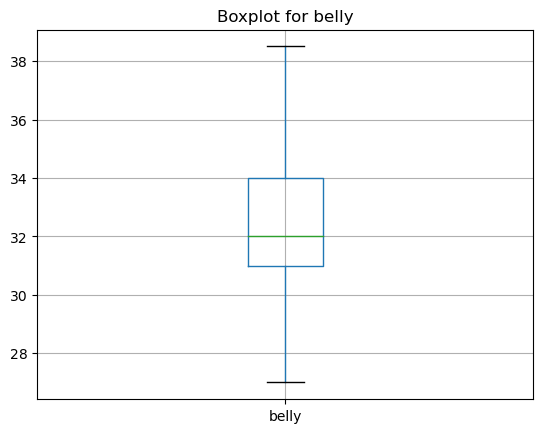

In [233]:
for column in df.columns:
    plt.figure() 
    df.boxplot(column=column)
    plt.title(f'Boxplot for {column}')
    plt.show()

<AxesSubplot:>

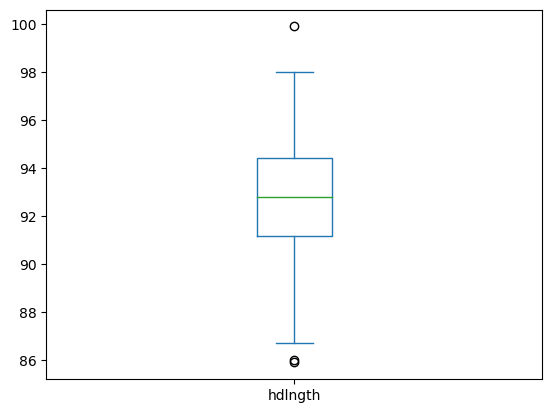

In [234]:
df['hdlngth'].plot(kind ='box')

In [235]:
df = df[(df['hdlngth'] > 86)]
df = df[(df['hdlngth'] < 99)]


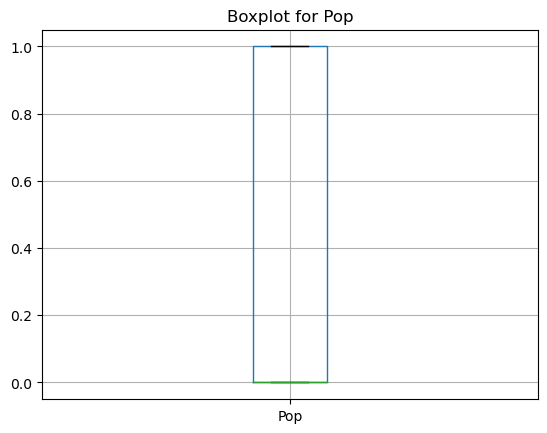

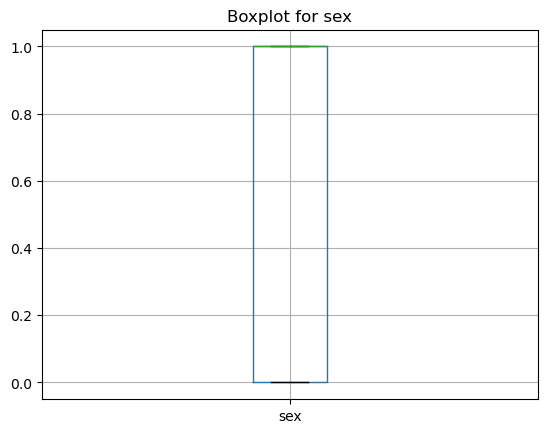

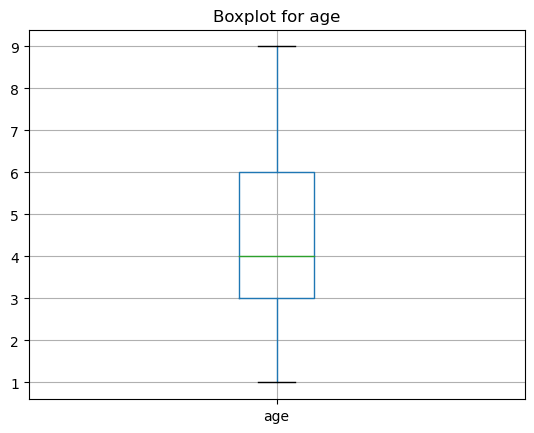

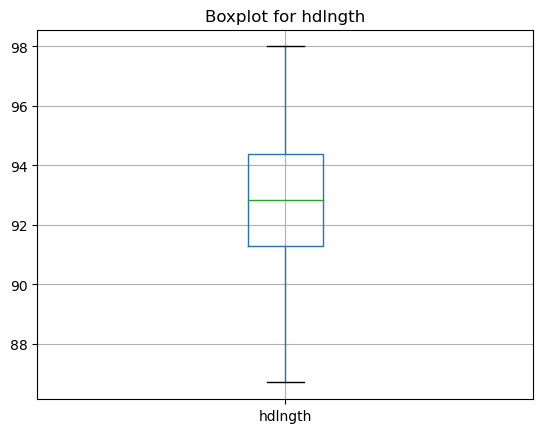

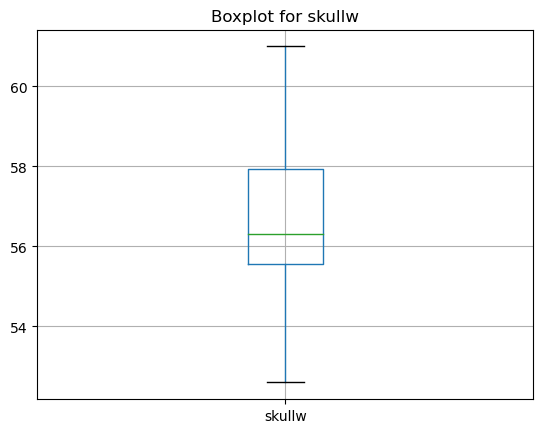

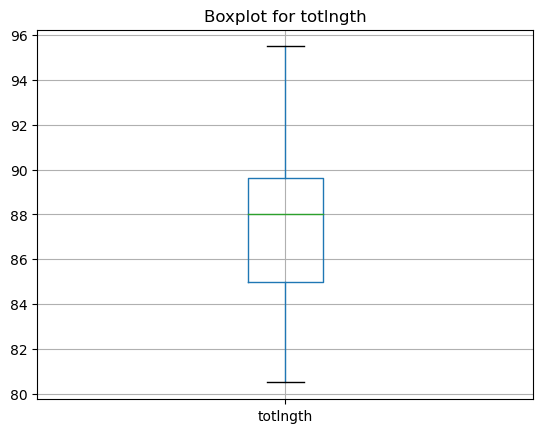

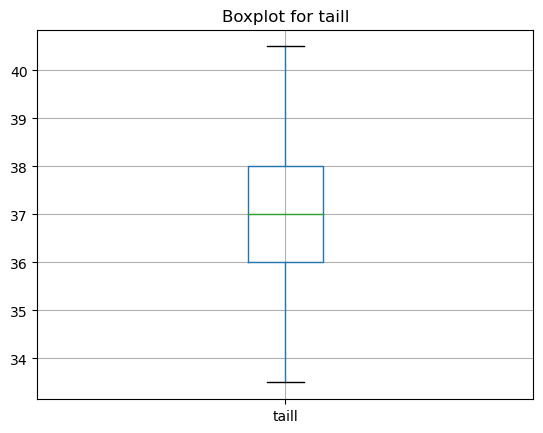

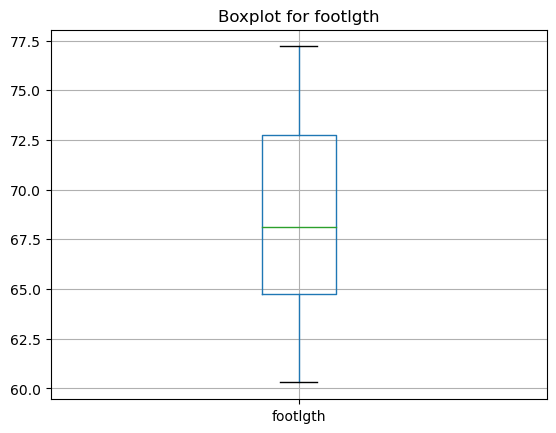

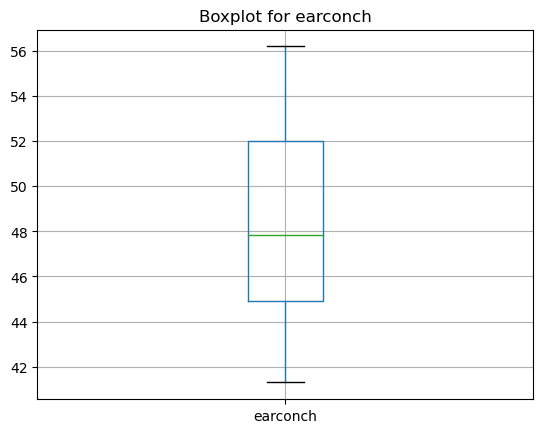

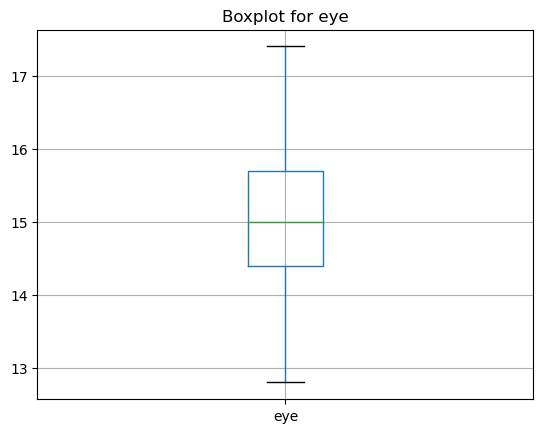

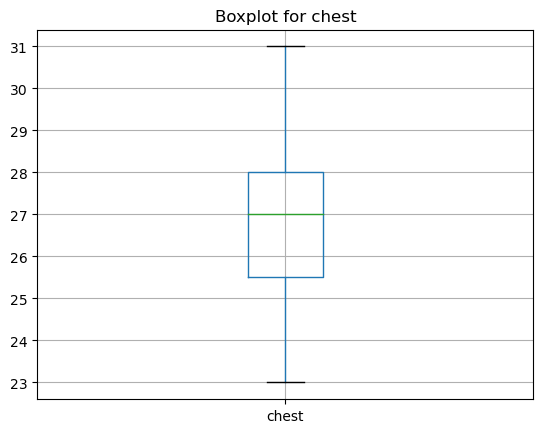

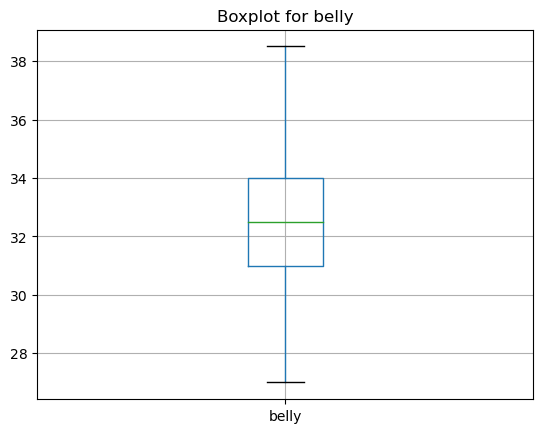

In [236]:
for column in df.columns:
    plt.figure() 
    df.boxplot(column=column)
    plt.title(f'Boxplot for {column}')
    plt.show()

In [237]:
# Разделение данных на признаки (X) и целевую переменную (y)
X = df.drop('age', axis=1)
y = df['age']

# Разделение данных на обучающий и тестовый набор
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

# Проверка качества модели на тестовом наборе
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'MSE на тестовом наборе: {mse}')

# проверяем r2
print(f"R2 на train: {model.score(X_train, y_train)}")
print(f"R2 на test: {model.score(X_test, y_test)}")

MSE на тестовом наборе: 6.0129470177377655
R2 на train: 0.3329943226210418
R2 на test: -0.13938892416052395


In [238]:
# Создаём X и y
X = df.drop('age',axis=1)
y = df['age']

# Разбиение на train и teat
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#StandardScaler()
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#модель
model = Ridge(alpha=1)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error на тестовом наборе: {mse}')

# проверяем r2
print(f"R2 на train: {model.score(X_train, y_train)}")
print(f"R2 на test: {model.score(X_test, y_test)}")

Mean Squared Error на тестовом наборе: 5.930767121542556
R2 на train: 0.33195346637215206
R2 на test: -0.12381671585114318


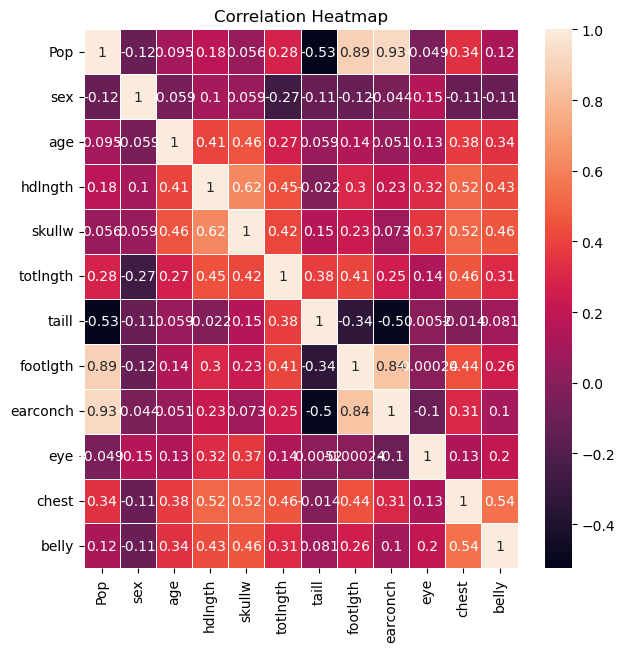

In [239]:
correlation_matrix = df.corr()
plt.figure(figsize=(7, 7))
sns.heatmap(correlation_matrix, annot=True, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [240]:
perm_importance = permutation_importance(model, X_test, y_test, n_repeats=30, random_state=42)

sorted_indices = perm_importance.importances_mean.argsort()[::-1]
for i in sorted_indices:
    feature = X.columns[i]
    print(f"{feature}:")
    print(f"    Пермутационная важность: {perm_importance['importances_mean'][i]}")
    print(f"    Стандартное отклонение: {perm_importance['importances_std'][i]}")

skullw:
    Пермутационная важность: 0.11564549426034675
    Стандартное отклонение: 0.08777521420526727
Pop:
    Пермутационная важность: 0.08946540098519937
    Стандартное отклонение: 0.07752135315424719
belly:
    Пермутационная важность: 0.02629791603306554
    Стандартное отклонение: 0.04305444977103955
hdlngth:
    Пермутационная важность: 0.016330110849984755
    Стандартное отклонение: 0.08378818880070954
footlgth:
    Пермутационная важность: 0.011437900239326908
    Стандартное отклонение: 0.13541209607430058
taill:
    Пермутационная важность: 0.010199240095850078
    Стандартное отклонение: 0.042344735845189836
chest:
    Пермутационная важность: 0.00999409072366122
    Стандартное отклонение: 0.012810958304506386
sex:
    Пермутационная важность: 0.0036737316303382173
    Стандартное отклонение: 0.01150596482699657
earconch:
    Пермутационная важность: 0.0014936207797488833
    Стандартное отклонение: 0.023467998189040946
eye:
    Пермутационная важность: -0.023046192999

In [241]:
# Разделение данных на признаки (X) и целевую переменную (y)
X = df[['skullw','Pop','belly','hdlngth','footlgth','taill','chest','sex','earconch','eye','totlngth']]
y = df['age']

# Разделение данных на обучающий и тестовый набор
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

# Проверка качества модели на тестовом наборе
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'MSE на тестовом наборе: {mse}')

# проверяем r2
print(f"R2 на train: {model.score(X_train, y_train)}")
print(f"R2 на test: {model.score(X_test, y_test)}")

MSE на тестовом наборе: 6.012947017737772
R2 на train: 0.3329943226210419
R2 на test: -0.13938892416052528


In [242]:
# Разделение данных на признаки (X) и целевую переменную (y)
X = df[['skullw','Pop','belly','hdlngth','footlgth','taill','chest','sex','earconch','eye']]
y = df['age']

# Разделение данных на обучающий и тестовый набор
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

# Проверка качества модели на тестовом наборе
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'MSE на тестовом наборе: {mse}')

# проверяем r2
print(f"R2 на train: {model.score(X_train, y_train)}")
print(f"R2 на test: {model.score(X_test, y_test)}")

MSE на тестовом наборе: 4.998065446039717
R2 на train: 0.30307348434177017
R2 на test: 0.052920241164938986


In [243]:
# Разделение данных на признаки (X) и целевую переменную (y)
X = df[['skullw','Pop','belly','hdlngth','footlgth','taill','chest','sex','earconch']]
y = df['age']

# Разделение данных на обучающий и тестовый набор
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

# Проверка качества модели на тестовом наборе
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'MSE на тестовом наборе: {mse}')

# проверяем r2
print(f"R2 на train: {model.score(X_train, y_train)}")
print(f"R2 на test: {model.score(X_test, y_test)}")

MSE на тестовом наборе: 5.1080756216759955
R2 на train: 0.3004017144808504
R2 на test: 0.03207449359803494


In [244]:
# Разделение данных на признаки (X) и целевую переменную (y)
X = df[['skullw','Pop','belly','hdlngth','footlgth','taill','chest','sex']]
y = df['age']

# Разделение данных на обучающий и тестовый набор
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

# Проверка качества модели на тестовом наборе
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'MSE на тестовом наборе: {mse}')

# проверяем r2
print(f"R2 на train: {model.score(X_train, y_train)}")
print(f"R2 на test: {model.score(X_test, y_test)}")

MSE на тестовом наборе: 5.220435983138222
R2 на train: 0.2988591859000128
R2 на test: 0.01078341104116598


In [245]:
# Разделение данных на признаки (X) и целевую переменную (y)
X = df[['skullw','Pop','belly','hdlngth','footlgth','taill','chest']]
y = df['age']

# Разделение данных на обучающий и тестовый набор
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

# Проверка качества модели на тестовом наборе
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'MSE на тестовом наборе: {mse}')

# проверяем r2
print(f"R2 на train: {model.score(X_train, y_train)}")
print(f"R2 на test: {model.score(X_test, y_test)}")

MSE на тестовом наборе: 5.124771708297511
R2 на train: 0.2866089766336971
R2 на test: 0.028910764378857978


In [246]:
# Разделение данных на признаки (X) и целевую переменную (y)
X = df[['skullw','Pop','belly','hdlngth','footlgth','taill']]
y = df['age']

# Разделение данных на обучающий и тестовый набор
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

# Проверка качества модели на тестовом наборе
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'MSE на тестовом наборе: {mse}')

# проверяем r2
print(f"R2 на train: {model.score(X_train, y_train)}")
print(f"R2 на test: {model.score(X_test, y_test)}")

MSE на тестовом наборе: 5.2067373877923835
R2 на train: 0.282862052803744
R2 на test: 0.01337914783504801


In [247]:
# Разделение данных на признаки (X) и целевую переменную (y)
X = df[['skullw','Pop','belly','hdlngth','footlgth']]
y = df['age']

# Разделение данных на обучающий и тестовый набор
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

# Проверка качества модели на тестовом наборе
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'MSE на тестовом наборе: {mse}')

# проверяем r2
print(f"R2 на train: {model.score(X_train, y_train)}")
print(f"R2 на test: {model.score(X_test, y_test)}")

MSE на тестовом наборе: 5.036887914429508
R2 на train: 0.272887287287746
R2 на test: 0.045563800078494365


In [248]:
# Разделение данных на признаки (X) и целевую переменную (y)
X = df[['skullw','Pop','belly','hdlngth']]
y = df['age']

# Разделение данных на обучающий и тестовый набор
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

# Проверка качества модели на тестовом наборе
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'MSE на тестовом наборе: {mse}')

# проверяем r2
print(f"R2 на train: {model.score(X_train, y_train)}")
print(f"R2 на test: {model.score(X_test, y_test)}")

MSE на тестовом наборе: 4.817955234405397
R2 на train: 0.2517298577088568
R2 на test: 0.08704919318446958


In [249]:
# Разделение данных на признаки (X) и целевую переменную (y)
X = df[['skullw','Pop','belly']]
y = df['age']

# Разделение данных на обучающий и тестовый набор
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

# Проверка качества модели на тестовом наборе
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'MSE на тестовом наборе: {mse}')

# проверяем r2
print(f"R2 на train: {model.score(X_train, y_train)}")
print(f"R2 на test: {model.score(X_test, y_test)}")

MSE на тестовом наборе: 4.316494287361998
R2 на train: 0.19988389651144922
R2 на test: 0.18207066057389232


In [250]:
# Разделение данных на признаки (X) и целевую переменную (y)
X = df[['skullw','Pop']]
y = df['age']

# Разделение данных на обучающий и тестовый набор
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

# Проверка качества модели на тестовом наборе
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'MSE на тестовом наборе: {mse}')

# проверяем r2
print(f"R2 на train: {model.score(X_train, y_train)}")
print(f"R2 на test: {model.score(X_test, y_test)}")

MSE на тестовом наборе: 4.470155359607409
R2 на train: 0.1841454770157519
R2 на test: 0.15295353659548727


In [251]:
# Разделение данных на признаки (X) и целевую переменную (y)
X = df[['skullw']]
y = df['age']

# Разделение данных на обучающий и тестовый набор
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

# Проверка качества модели на тестовом наборе
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'MSE на тестовом наборе: {mse}')

# проверяем r2
print(f"R2 на train: {model.score(X_train, y_train)}")
print(f"R2 на test: {model.score(X_test, y_test)}")

MSE на тестовом наборе: 4.524524953046897
R2 на train: 0.18227714801492012
R2 на test: 0.14265108217616163


In [252]:
# Разделение данных на признаки (X) и целевую переменную (y)
X = df[['skullw','Pop','belly']]
y = df['age']

# Разделение данных на обучающий и тестовый набор
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

# Проверка качества модели на тестовом наборе
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'MSE на тестовом наборе: {mse}')

# проверяем r2
print(f"R2 на train: {model.score(X_train, y_train)}")
print(f"R2 на test: {model.score(X_test, y_test)}")

MSE на тестовом наборе: 4.316494287361998
R2 на train: 0.19988389651144922
R2 на test: 0.18207066057389232


In [253]:
# Создаём X и y
X = df[['skullw','Pop','belly']]
y = df['age']

# Разбиение на train и teat
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#StandardScaler()
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#модель
model = Ridge(alpha=1)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error на тестовом наборе: {mse}')

# проверяем r2
print(f"R2 на train: {model.score(X_train, y_train)}")
print(f"R2 на test: {model.score(X_test, y_test)}")

Mean Squared Error на тестовом наборе: 4.327218546902071
R2 на train: 0.199853144782127
R2 на test: 0.18003852849227964


### Результат
#### Было 0.06083724047810879
#### Стало 0.18003852849227964

# Градиентный бустинг

In [254]:
X = df[['skullw','Pop','belly']]
y = df['age']

# Разбиение на train и teat
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание объекта модели градиентного бустинга
model = xgb.XGBRegressor()

# Обучение модели
model.fit(X_train, y_train)

# Предсказание на тестовом наборе
y_pred = model.predict(X_test)

# Оценка качества модели
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
# проверяем r2
print(f"R2 на train: {model.score(X_train, y_train)}")
print(f"R2 на test: {model.score(X_test, y_test)}")

Mean Squared Error: 8.272968453119937
R2 на train: 0.9495297303442171
R2 на test: -0.5676387298287964


In [259]:
X = df.drop('age', axis=1)
y = df['age']

# Разбиение на train и teat
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание объекта модели градиентного бустинга
model = xgb.XGBRegressor()

# Обучение модели
model.fit(X_train, y_train)

# Предсказание на тестовом наборе
y_pred = model.predict(X_test)

# Оценка качества модели
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
# проверяем r2
print(f"R2 на train: {model.score(X_train, y_train)}")
print(f"R2 на test: {model.score(X_test, y_test)}")

Mean Squared Error: 6.41571418247888
R2 на train: 0.9999998619565879
R2 на test: -0.2157089790633555


# Адаптивный бустинг

In [263]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier  
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.multiclass import OneVsRestClassifier

X = df.drop('age', axis=1)
y = df['age']

# Разбиение на train и teat
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Создание объекта классификатора AdaBoost
# Можно выбрать любой базовый классификатор, например, дерево решений
base_classifier = DecisionTreeClassifier(max_depth=1)
adaboost_model = OneVsRestClassifier(AdaBoostClassifier(base_classifier, n_estimators=50, learning_rate=1.0))

# Обучение модели
adaboost_model.fit(X_train, y_train)

# Предсказание вероятностей на тестовом наборе
y_pred_prob = adaboost_model.predict_proba(X_test)

# Переводим предсказанные вероятности в предсказанные классы
y_pred = adaboost_model.predict(X_test)

# Оценка качества модели с помощью коэффициента детерминации (R^2)
r2 = r2_score(y_test, y_pred)
print(f"R^2: {r2}")

R^2: -0.3264248704663213


In [264]:
X = df[['skullw','Pop','belly']]
y = df['age']

# Разбиение на train и teat
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Создание объекта классификатора AdaBoost
# Можно выбрать любой базовый классификатор, например, дерево решений
base_classifier = DecisionTreeClassifier(max_depth=1)
adaboost_model = OneVsRestClassifier(AdaBoostClassifier(base_classifier, n_estimators=50, learning_rate=1.0))

# Обучение модели
adaboost_model.fit(X_train, y_train)

# Предсказание вероятностей на тестовом наборе
y_pred_prob = adaboost_model.predict_proba(X_test)

# Переводим предсказанные вероятности в предсказанные классы
y_pred = adaboost_model.predict(X_test)

# Оценка качества модели с помощью коэффициента детерминации (R^2)
r2 = r2_score(y_test, y_pred)
print(f"R^2: {r2}")

R^2: -1.321243523316062
